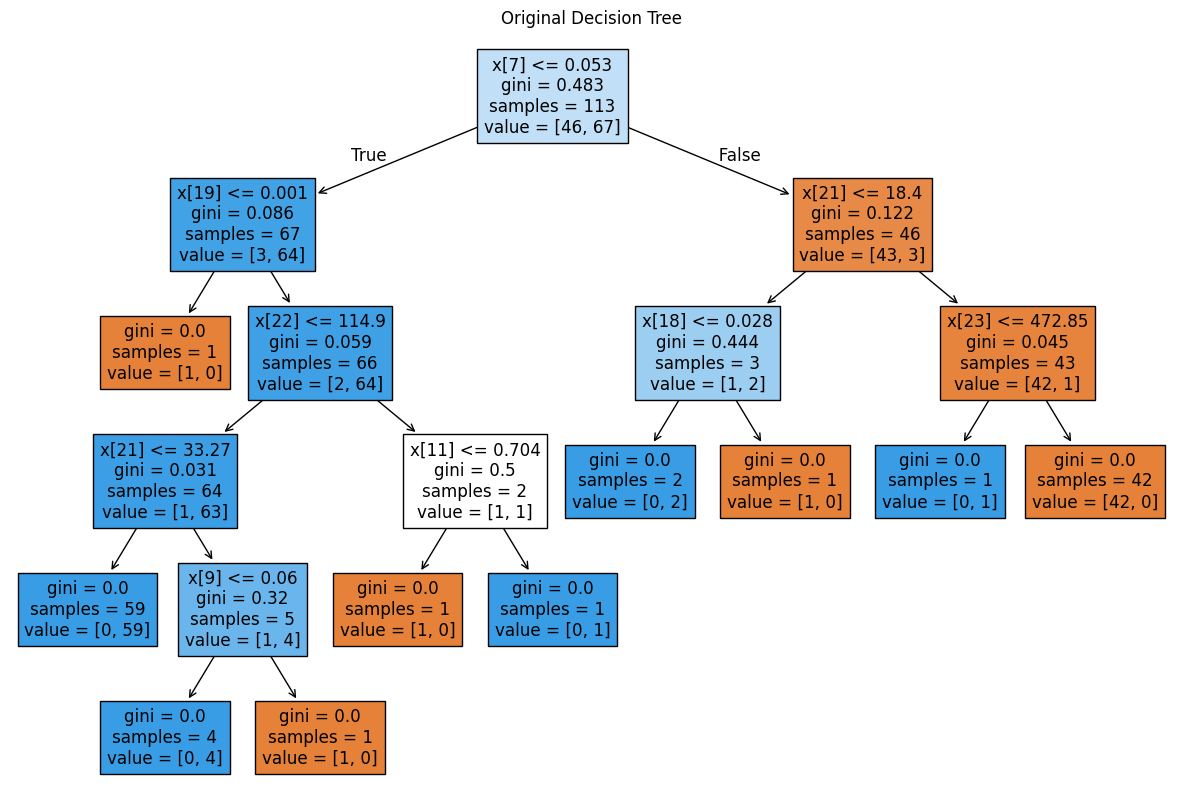

Accuracy before pruning: 0.8881578947368421


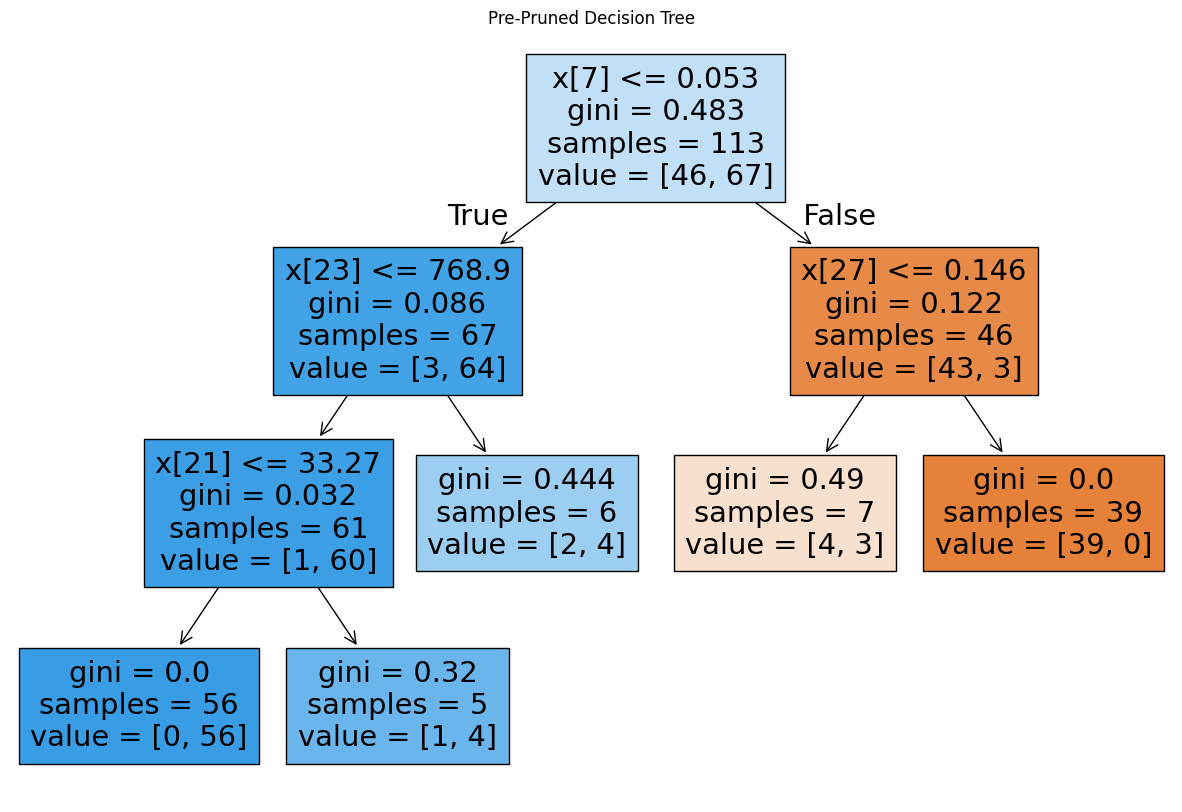

Accuracy after pre-pruning: 0.8991228070175439


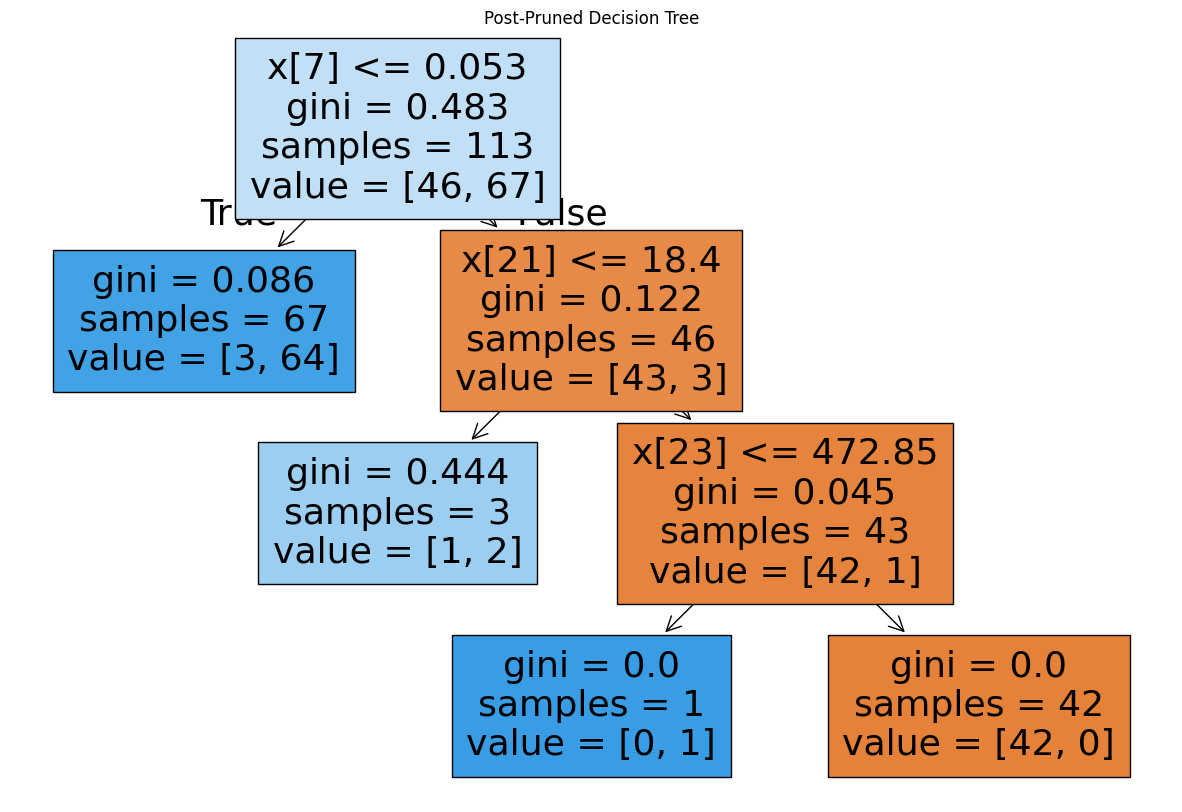


--- Accuracy Comparison ---
Original Tree Accuracy: 0.8882
Pre-Pruned Tree Accuracy: 0.8991
Post-Pruned Tree Accuracy: 0.9167


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion="gini", random_state=42).fit(X_train, y_train)
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True)
plt.title("Original Decision Tree")
plt.show()
print("Accuracy before pruning:", model.score(X_test, y_test))

pre_pruned_model = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=5, random_state=42).fit(X_train, y_train)
plt.figure(figsize=(15, 10))
plot_tree(pre_pruned_model, filled=True)
plt.title("Pre-Pruned Decision Tree")
plt.show()
print("Accuracy after pre-pruning:", pre_pruned_model.score(X_test, y_test))

path = model.cost_complexity_pruning_path(X_train, y_train)
pruned_trees = [DecisionTreeClassifier(criterion="gini", ccp_alpha=alpha, random_state=42).fit(X_train, y_train) for alpha in path.ccp_alphas]
best_tree = pruned_trees[max(range(len(pruned_trees)), key=lambda i: pruned_trees[i].score(X_test, y_test))]
plt.figure(figsize=(15, 10))
plot_tree(best_tree, filled=True)
plt.title("Post-Pruned Decision Tree")
plt.show()

print("\n--- Accuracy Comparison ---")
print(f"Original Tree Accuracy: {model.score(X_test, y_test):.4f}")
print(f"Pre-Pruned Tree Accuracy: {pre_pruned_model.score(X_test, y_test):.4f}")
print(f"Post-Pruned Tree Accuracy: {best_tree.score(X_test, y_test):.4f}")